In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

#PI
PI = np.pi

#Aplica estilos basicos a los graficos
def basic_styles(a):
    a.axhline(0, color='black', linewidth=2)
    a.axvline(0, color='black', linewidth=2)
    a.grid(True)

## Ejercicio 1: Señales de tiempo discreto y continuo

### 1.1) Calcule la potencia o la energia segun corresponda
---
(a) Señal formada por escalones: **u(t)-u(t-2)**

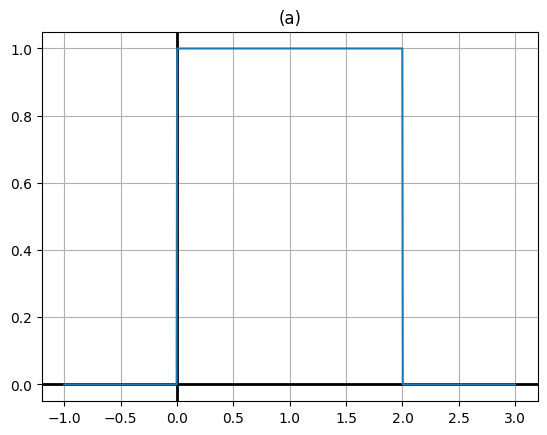

In [2]:
#Escalon unitario
def u(t):
    return np.where(t >=0,1,0)

t = np.linspace(-1,3,1000)
a = u(t)-u(t-2)
plt.title("(a)")
basic_styles(plt)
plt.plot(t,a)

In [3]:
energia = integrate.simpson(a**2,t)
print(f"La energia es {energia:.2f}")

La energia es 2.00


---

(b) Coseno

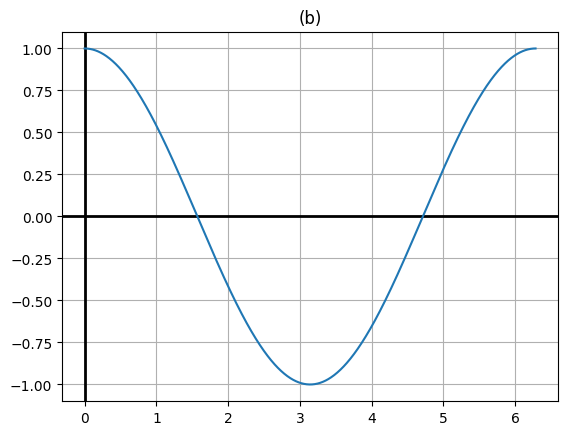

In [4]:
T = 2*PI

t = np.linspace(0,T,1000)
x = np.cos(t)

plt.title("(b)")
basic_styles(plt)
plt.plot(t,x)

In [5]:
potencia = (1/T)*integrate.simpson(x**2,t)
print(f"La potencia es {potencia:.2f}")

La potencia es 0.50


---
(c) Senal discreta con valores distintos de 0 en el intervalo entre -4 y 3

<StemContainer object of 3 artists>

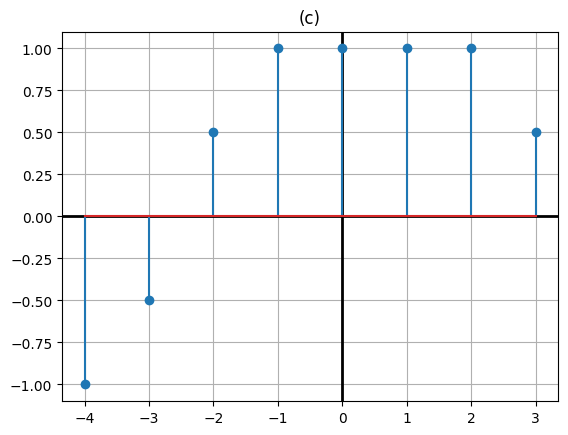

In [6]:
n = np.arange(-4,4,1)
x = np.array([-1,-0.5,0.5,1,1,1,1,0.5])
plt.title("(c)")
basic_styles(plt)
plt.stem(n,x)

In [7]:
energia= np.sum(np.abs(x)**2)
print(f"La energia total es {energia:.2f}")

La energia total es 5.75


---
(d) Señal discreta con valores distintos de 0 en el intervalo desde -4 hasta -1

<StemContainer object of 3 artists>

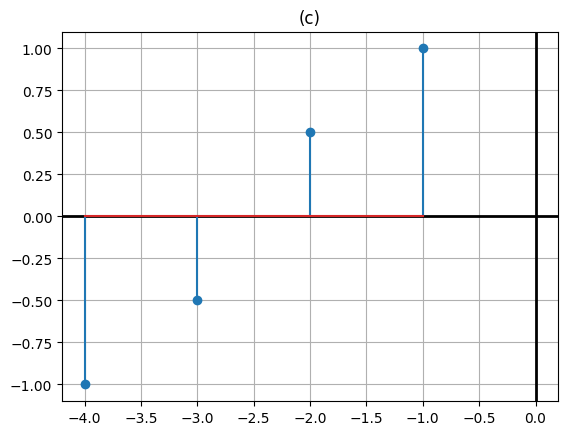

In [8]:
n = np.arange(-4,0,1)
x = np.array([-1,-0.5,0.5,1])
plt.title("(c)")
basic_styles(plt)
plt.stem(n,x)

In [9]:
energia= np.sum(np.abs(x)**2)
print(f"La energia total es {energia:.2f}")

La energia total es 2.50


---
---
### 1.2) Grafique las siguientes señales

<StemContainer object of 3 artists>

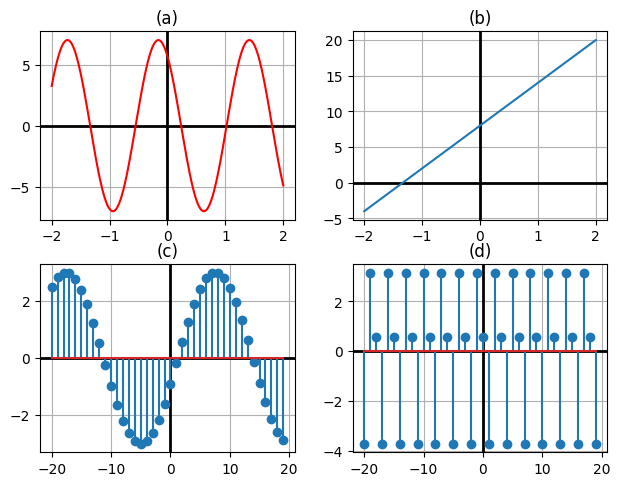

In [10]:
#Funciones continuas
t = np.linspace(-2,2,10000)
a = 7*np.cos(4*t + PI/5)
b = 6*t + 8
#Funciones discretas
n = np.arange(-20,20,1)
c = 3*np.cos(n/4 - 3*PI/5)
d = 4*np.sin(n*6*PI/9 + 3)

#Configuracion graficos
fig, axs = plt.subplots(2,2)
fig.tight_layout()
sA = axs[0][0]
sB = axs[0][1]
sC = axs[1][0]
sD = axs[1][1]
#Grafico de a
sA.set_title("(a)")
basic_styles(sA)
sA.plot(t,a,color = "red")
#Grafico de b
sB.set_title("(b)")
basic_styles(sB)
sB.plot(t,b)
#Grafico de c
sC.set_title("(c)")
basic_styles(sC)
sC.stem(n,c)
#Grafico de d
sD.set_title("(d)")
basic_styles(sD)
sD.stem(n,d)

---
---
### Funcion para determinar la periodecidad de funciones de tiempo discreto

In [ ]:
def es_periodico(x):
    """
    Recibe una muesta de la señal como un arreglo y devuelve un booleano y un numero.
    Estos indican si la señal es periodica y su periodo\n
    Ejemplo funcion periodica: (True, numero)\n
    Ejemplo funcion no periodica: (False, 0)
    """
    x = np.array(np.round(x,10))
    per = 1
    #Recorro el array hasta encontrar nuevamente ese valor
    cmp_pos = 0
    cmp_val = x[cmp_pos]
    for i in range(1,len(x)):
        if x[i] != cmp_val:
            per += 1
        else:
            break
    
    if per == len(x):
        return (False, 0)
    
    for a in range(0,per):
        cmp_pos = a
        cmp_val = x[a]
        for i in range(cmp_pos,len(x),per):
            if x[i] == cmp_val:
                continue
            else:
                return (False,0)

    return (True,per)

#Pruebas con funciones discretas
test1 = np.array([1,2,3,4,1,2,3,4,1,2])
test2 = np.array([1,2,3,1,2,3,1,2,3,4,5,6,7])
test3 = c
test4 = d
print("Test 1: ",es_periodico(test1))
print("Test 2: ",es_periodico(test2))
print("Test 3: ",es_periodico(test3))
print("Test 4: ",es_periodico(test4))



Test 1:  (True, 4)
Test 2:  (False, 0)
Test 3:  (False, 0)
Test 4:  (True, 3)
